In [270]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection   
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier

### Loading the data and cleaning the data

In [237]:
PY = pd.read_csv(r"C:\Users\fatma\OneDrive\Desktop\Ahmed Project\ML AHMED\NLP\youtube scam\datasets_5749_8555_Youtube01-Psy.csv")
katty= pd.read_csv(r"C:\Users\fatma\OneDrive\Desktop\Ahmed Project\ML AHMED\NLP\youtube scam\datasets_5749_8555_Youtube02-KatyPerry.csv")
LMAFO= pd.read_csv(r"C:\Users\fatma\OneDrive\Desktop\Ahmed Project\ML AHMED\NLP\youtube scam\datasets_5749_8555_Youtube03-LMFAO.csv")
Eminiem= pd.read_csv(r"C:\Users\fatma\OneDrive\Desktop\Ahmed Project\ML AHMED\NLP\youtube scam\datasets_5749_8555_Youtube04-Eminem.csv")
Shakera= pd.read_csv(r"C:\Users\fatma\OneDrive\Desktop\Ahmed Project\ML AHMED\NLP\youtube scam\datasets_5749_8555_Youtube05-Shakira.csv")

In [238]:
# remove the extra columns 
katty=katty.drop(['COMMENT_ID','DATE','AUTHOR'], axis=1)
PY=PY.drop(['COMMENT_ID','DATE','AUTHOR'], axis=1)
LMAFO=LMAFO.drop(['COMMENT_ID','DATE','AUTHOR'], axis=1)
Eminiem=Eminiem.drop(['COMMENT_ID','DATE','AUTHOR'], axis=1)
Shakera=Shakera.drop(['COMMENT_ID','DATE','AUTHOR'], axis=1)

In [239]:
# Join the data
Youtube_data=pd.concat([katty, PY,LMAFO,Eminiem,Shakera], ignore_index=True)
Youtube_data.head()

,CONTENT,CLASS
0,i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can Too! http://www...,1
1,http://www.billboard.com/articles/columns/pop-shop/6174122/fan-army-face-off-round-3 Vote for SO...,1
2,Hey guys! Please join me in my fight to help abused/mistreated animals! All fund will go to hel...,1
3,http://psnboss.com/?ref=2tGgp3pV6L this is the song﻿,1
4,Hey everyone. Watch this trailer!!!!!!!! http://believemefilm.com?hlr=h2hQBUVB﻿,1


### Feature engneering 

In [240]:
Youtube_data['CLASS']=Youtube_data['CLASS'].replace({1: 'Spam', 0: 'not Spam'})

In [241]:
print("Youtube data has {} rows and {} columns".format(len(Youtube_data), len(Youtube_data.columns)))

Youtube data has 1956 rows and 2 columns


In [242]:
print("Out of {} rows, {} are scam , {} are not scam".format(len(Youtube_data),
                                                       len(Youtube_data[Youtube_data['CLASS']=='Spam']),
                                                       len(Youtube_data[Youtube_data['CLASS']=='not Spam'])))

Out of 1956 rows, 1005 are scam , 951 are not scam


In [243]:
# Measure the % of punctuation
def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

Youtube_data['punct%'] = Youtube_data['CONTENT'].apply(lambda x: punct_count(x))

Youtube_data.head()

,CONTENT,CLASS,punct%
0,i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can Too! http://www...,Spam,9.3
1,http://www.billboard.com/articles/columns/pop-shop/6174122/fan-army-face-off-round-3 Vote for SO...,Spam,21.3
2,Hey guys! Please join me in my fight to help abused/mistreated animals! All fund will go to hel...,Spam,5.6
3,http://psnboss.com/?ref=2tGgp3pV6L this is the song﻿,Spam,14.6
4,Hey everyone. Watch this trailer!!!!!!!! http://believemefilm.com?hlr=h2hQBUVB﻿,Spam,20.3


In [244]:
# Measure the length of the comment 

Youtube_data['body_len'] = Youtube_data['CONTENT'].apply(lambda x: len(x) - x.count(" "))

Youtube_data.head()

,CONTENT,CLASS,punct%,body_len
0,i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can Too! http://www...,Spam,9.3,107
1,http://www.billboard.com/articles/columns/pop-shop/6174122/fan-army-face-off-round-3 Vote for SO...,Spam,21.3,150
2,Hey guys! Please join me in my fight to help abused/mistreated animals! All fund will go to hel...,Spam,5.6,286
3,http://psnboss.com/?ref=2tGgp3pV6L this is the song﻿,Spam,14.6,48
4,Hey everyone. Watch this trailer!!!!!!!! http://believemefilm.com?hlr=h2hQBUVB﻿,Spam,20.3,74


### Obtaning the plot of punct%	body_len and Transform the data

In [245]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

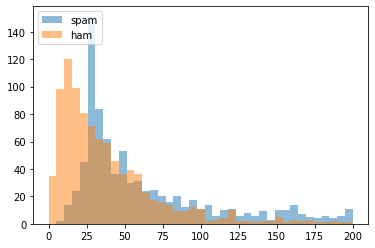

In [246]:
bins = np.linspace(0, 200, 40)

pyplot.hist(Youtube_data[Youtube_data['CLASS']=='Spam']['body_len'], bins, alpha=0.5, label='spam')
pyplot.hist(Youtube_data[Youtube_data['CLASS']=='not Spam']['body_len'], bins, alpha=0.5, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

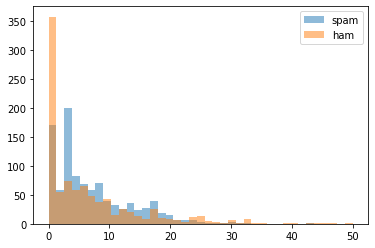

In [247]:
bins = np.linspace(0, 50, 40)

pyplot.hist(Youtube_data[Youtube_data['CLASS']=='Spam']['punct%'], bins, alpha=0.5, label='spam')
pyplot.hist(Youtube_data[Youtube_data['CLASS']=='not Spam']['punct%'], bins, alpha=0.5, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

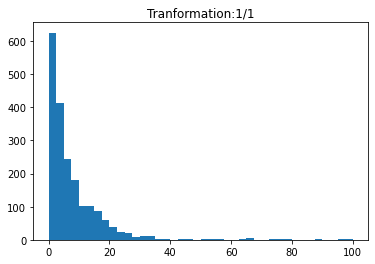

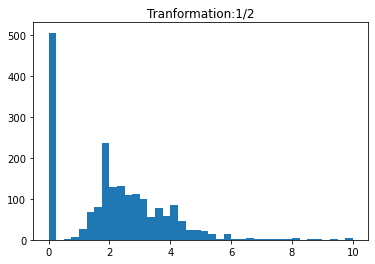

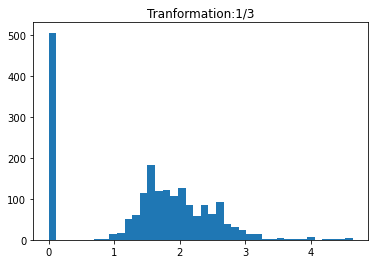

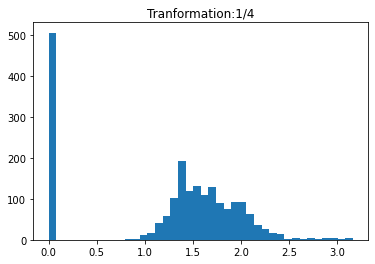

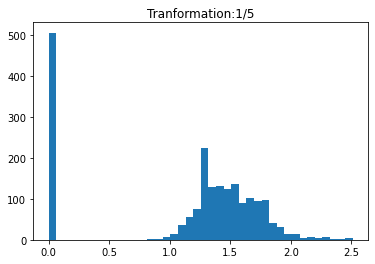

In [248]:
for i in [1,2,3,4,5]:
    pyplot.hist((Youtube_data['punct%'])**(1/i),bins=40)
    pyplot.title("Tranformation:1/{}".format(str(i)))
    pyplot.show()

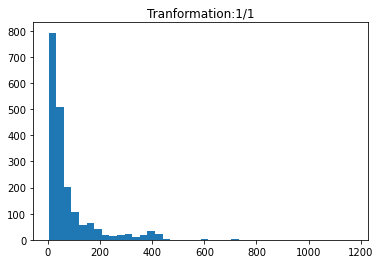

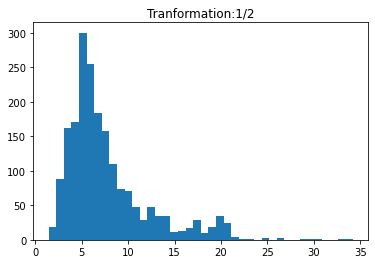

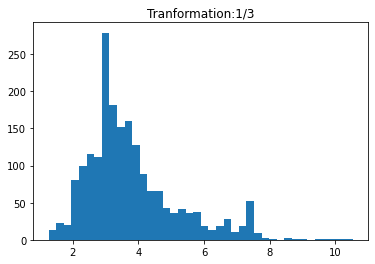

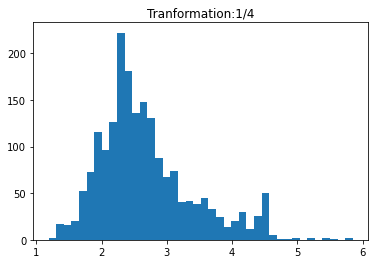

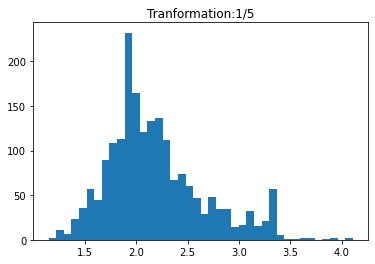

In [249]:
for i in [1,2,3,4,5]:
    pyplot.hist((Youtube_data['body_len'])**(1/i),bins=40)
    pyplot.title("Tranformation:1/{}".format(str(i)))
    pyplot.show()    

In [250]:
# Transform punct%
Youtube_data['punct%']=Youtube_data['punct%']**(1/5)

In [251]:
# Transform body_len
Youtube_data['body_len']=Youtube_data['body_len']**(1/4)

In [252]:
Youtube_data.head()

,CONTENT,CLASS,punct%,body_len
0,i love this so much. AND also I Generate Free Leads on Auto Pilot &amp; You Can Too! http://www...,Spam,1.562056,3.216221
1,http://www.billboard.com/articles/columns/pop-shop/6174122/fan-army-face-off-round-3 Vote for SO...,Spam,1.843639,3.499636
2,Hey guys! Please join me in my fight to help abused/mistreated animals! All fund will go to hel...,Spam,1.411359,4.112364
3,http://psnboss.com/?ref=2tGgp3pV6L this is the song﻿,Spam,1.709506,2.632148
4,Hey everyone. Watch this trailer!!!!!!!! http://believemefilm.com?hlr=h2hQBUVB﻿,Spam,1.825993,2.932972


### USE NLTK to create tokens, remove punctuation and remove stop words

In [253]:
def text_clean(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


In [254]:
# Use TfidfVectorizer to transform the data 
tfidf_vect = TfidfVectorizer(analyzer=text_clean)
X_tfidf = tfidf_vect.fit_transform(Youtube_data['CONTENT'])


X_features = pd.concat([Youtube_data['body_len'], Youtube_data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658
0,3.216221,1.562056,0.058999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.499636,1.843639,0.059383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.112364,1.411359,0.028128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.632148,1.709506,0.139590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.932972,1.825993,0.088959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
# try out cross validation to obtian what section of the data produce the vest accuracy 
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, Youtube_data['CLASS'], cv=k_fold, scoring='accuracy', n_jobs=-1)


array([0.91836735, 0.86700767, 0.90792839, 0.96163683, 0.95652174])

In [256]:
# Split the data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X_features, Youtube_data['CLASS'], test_size=0.2)

In [257]:
# Obtaing the top features in the data
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [258]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.08548421470584554, 'body_len'),
 (0.08208662820737328, 612),
 (0.06347190729853071, 3075),
 (0.059250860461982274, 2493),
 (0.05735602934026158, 0),
 (0.042827272768758376, 'punct%'),
 (0.04044661022438475, 3611),
 (0.031139235218432888, 2049),
 (0.02328899874168011, 2966),
 (0.021592607512107093, 3377)]

#### Using random forest and TfidfVectorizer to predict the Spam comments 

In [259]:
# Obtaining precision, recall, accuracy, support
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='Spam', average='binary')

In [260]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.963 / Recall: 0.887 / Accuracy: 0.923


### Using RF, TfidfVectorizer and Grid seach to obtain the tree with the least performace 

In [261]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='Spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [262]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 0.942 / Recall: 0.798 / Accuracy: 0.87
Est: 10 / Depth: 20 ---- Precision: 0.918 / Recall: 0.833 / Accuracy: 0.875
Est: 10 / Depth: 30 ---- Precision: 0.947 / Recall: 0.872 / Accuracy: 0.908
Est: 10 / Depth: None ---- Precision: 0.914 / Recall: 0.941 / Accuracy: 0.923
Est: 50 / Depth: 10 ---- Precision: 0.933 / Recall: 0.823 / Accuracy: 0.878
Est: 50 / Depth: 20 ---- Precision: 0.932 / Recall: 0.813 / Accuracy: 0.872
Est: 50 / Depth: 30 ---- Precision: 0.956 / Recall: 0.852 / Accuracy: 0.903
Est: 50 / Depth: None ---- Precision: 0.95 / Recall: 0.946 / Accuracy: 0.946
Est: 100 / Depth: 10 ---- Precision: 0.923 / Recall: 0.823 / Accuracy: 0.872
Est: 100 / Depth: 20 ---- Precision: 0.965 / Recall: 0.823 / Accuracy: 0.893
Est: 100 / Depth: 30 ---- Precision: 0.972 / Recall: 0.862 / Accuracy: 0.916
Est: 100 / Depth: None ---- Precision: 0.95 / Recall: 0.946 / Accuracy: 0.946


### Compareing the results of RF with the TfidfVectorizer and the counter vectorized for the top pram combination

In [264]:
# Results for the TfidfVectorizer

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_features, Youtube_data['CLASS'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
11,14.074138,0.211312,0.930480,None,300,"{'max_depth': None, 'n_estimators': 300}",1,0.910714,0.887468,0.943734,0.964194,0.946292,0.723540,0.039126,0.027579
8,16.058197,0.295718,0.929464,90,300,"{'max_depth': 90, 'n_estimators': 300}",2,0.897959,0.892583,0.943734,0.966752,0.946292,0.956869,0.058780,0.029086
7,7.609134,0.169287,0.928438,90,150,"{'max_depth': 90, 'n_estimators': 150}",3,0.903061,0.890026,0.941176,0.959079,0.948849,0.212220,0.006107,0.026971
10,8.463015,0.178704,0.927414,None,150,"{'max_depth': None, 'n_estimators': 150}",4,0.905612,0.882353,0.938619,0.961637,0.948849,0.632381,0.040772,0.029196
5,13.543422,0.270323,0.920787,60,300,"{'max_depth': 60, 'n_estimators': 300}",5,0.862245,0.884910,0.943734,0.964194,0.948849,0.278305,0.030510,0.039781


In [267]:
# obtaing CountVectorizer
count_vect = CountVectorizer(analyzer=text_clean)
X_count = count_vect.fit_transform(Youtube_data['CONTENT'])
X_count_feat = pd.concat([Youtube_data['body_len'], Youtube_data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658
0,3.216221,1.562056,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.499636,1.843639,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.112364,1.411359,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.632148,1.709506,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.932972,1.825993,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
# Results for the CountVectorizer

rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, Youtube_data['CLASS'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,mean_score_time,mean_test_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
8,16.205740,0.295858,0.925384,90,300,"{'max_depth': 90, 'n_estimators': 300}",1,0.875000,0.902813,0.951407,0.964194,0.933504,0.521781,0.010600,0.032549
7,8.338556,0.198375,0.925380,90,150,"{'max_depth': 90, 'n_estimators': 150}",2,0.882653,0.897698,0.938619,0.966752,0.941176,0.538322,0.007164,0.030752
10,8.169155,0.208094,0.924860,None,150,"{'max_depth': None, 'n_estimators': 150}",3,0.897959,0.884910,0.943734,0.953964,0.943734,0.238789,0.018047,0.027854
11,15.357614,0.222849,0.924345,None,300,"{'max_depth': None, 'n_estimators': 300}",4,0.905612,0.874680,0.938619,0.964194,0.938619,0.259062,0.072133,0.031026
5,13.980550,0.316110,0.906493,60,300,"{'max_depth': 60, 'n_estimators': 300}",5,0.806122,0.867008,0.943734,0.966752,0.948849,0.466010,0.072637,0.060738


In [269]:
# TfidfVectorizer perfromed better and faster and therefore it is chosen for the random forest model 

### Duplicating the tests using GradientBoostingClassifier

In [271]:
# Using GB and Grid seach to obtain the tree with the least performace 
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [272]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.981 / Recall: 0.754 / Accuracy: 0.865
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.963 / Recall: 0.906 / Accuracy: 0.934
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.954 / Recall: 0.921 / Accuracy: 0.936
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.948 / Recall: 0.906 / Accuracy: 0.926
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.964 / Recall: 0.921 / Accuracy: 0.941
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.974 / Recall: 0.931 / Accuracy: 0.952
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.93 / Recall: 0.916 / Accuracy: 0.921
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.954 / Recall: 0.921 / Accuracy: 0.936
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.969 / Recall: 0.921 / Accuracy: 0.944
Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.926 / Recall: 0.921 / Accuracy: 0.921
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.945 / Recall: 0.926 / Accuracy: 0.934
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.959 / Recall: 0.9

### Compareing the results of GB with the TfidfVectorizer and the counter vectorized for the top pram combination

In [273]:
# Results for the TfidfVectorizer
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_features, Youtube_data['CLASS'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,mean_score_time,mean_test_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
2,60.786382,0.098517,0.921800,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",1,0.880102,0.869565,0.933504,0.976982,0.948849,1.990537,0.001327,0.040941
3,91.407294,0.107507,0.921799,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",2,0.882653,0.867008,0.930946,0.974425,0.953964,2.746039,0.010249,0.041042
5,98.713917,0.089764,0.920777,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",3,0.880102,0.864450,0.933504,0.974425,0.951407,3.269622,0.010650,0.041965
0,42.956108,0.126901,0.917723,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",4,0.852041,0.874680,0.925831,0.979540,0.956522,1.905399,0.022646,0.048082
4,64.921709,0.107218,0.915153,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}",5,0.875000,0.854220,0.928389,0.974425,0.943734,3.322526,0.021583,0.044340


In [274]:
## Results for the CountVectorizer
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_count_feat, Youtube_data['CLASS'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,mean_score_time,mean_test_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_fit_time,std_score_time,std_test_score
1,42.623788,0.110282,0.903408,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",1,0.836735,0.836317,0.928389,0.964194,0.951407,1.707963,0.012065,0.055802
8,105.052958,0.116336,0.903398,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",2,0.857143,0.838875,0.923274,0.953964,0.943734,2.800658,0.010314,0.046651
0,21.096405,0.131895,0.902896,0.1,7,50,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}",3,0.839286,0.836317,0.925831,0.964194,0.948849,0.713244,0.025915,0.054542
2,66.010273,0.135352,0.902392,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",4,0.823980,0.841432,0.925831,0.964194,0.956522,2.048406,0.025047,0.058589
5,92.377014,0.109862,0.902381,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",5,0.844388,0.836317,0.920716,0.961637,0.948849,2.172270,0.006665,0.052411


In [275]:
# TfidfVectorizer perfromed better and faster and therefore it is chosen for the GradientBoostingClassifier model 

### Final comparsion of TfidfVectorizer in RF and GB To select the best model

###Vectorizing on only the traning set not the entire set

In [276]:
# train on 'CONTENT', 'body_len', 'punct%'
X_train, X_test, y_train, y_test = train_test_split(Youtube_data[['CONTENT', 'body_len', 'punct%']], Youtube_data['CLASS'], test_size=0.2)

In [277]:
tfidf_vect = TfidfVectorizer(analyzer=text_clean)
tfidf_vect_fit = tfidf_vect.fit(X_train['CONTENT'])

tfidf_train = tfidf_vect_fit.transform(X_train['CONTENT'])
tfidf_test = tfidf_vect_fit.transform(X_test['CONTENT'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,3158,3159,3160,3161,3162,3163,3164,3165,3166,3167
0,2.590020,0.000000,0.100035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.466326,1.519487,0.111893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.659148,1.148698,0.103374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.432299,0.000000,0.086844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.140695,0.000000,0.253748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Evaluating RF vs GB


In [282]:
import time
rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 0.532 / Predict time: 0.163 ---- Precision: 0.973 / Recall: 0.932 / Accuracy: 0.954


In [285]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=7)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 47.576 / Predict time: 0.056 ---- Precision: 0.951 / Recall: 0.906 / Accuracy: 0.931


In [286]:
# The values of n_estimators and max_depth were chosen based on the best values of accuracy obtained from the Grid search

In [288]:
# based on the reults we decide that RF is faster and produced accurate results and therefore RF with TfidfVectorizer is the best model to predict the spam commnets in youtube 